In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


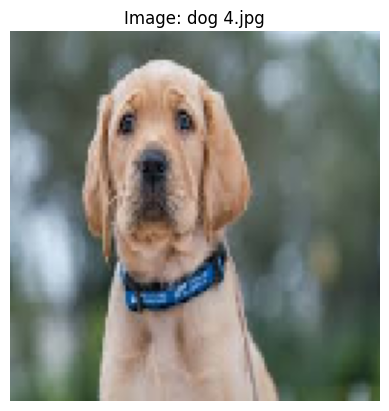

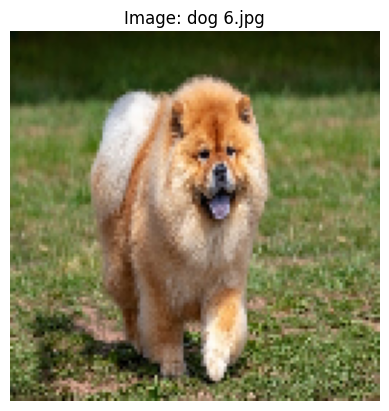

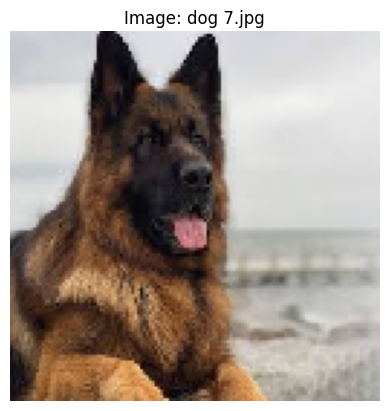

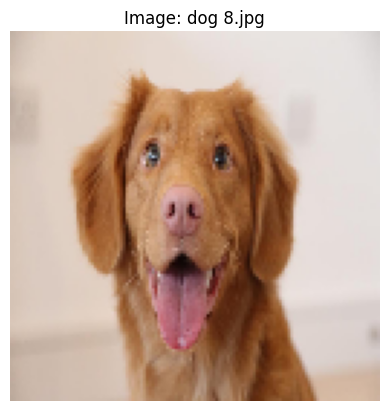

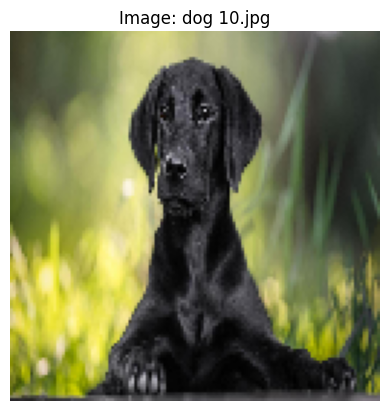

In [2]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Set your folder path
folder_path = '/content/drive/MyDrive/dataset/Train/dog'

# List image files (jpg/png)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Show first 5 images
for i in range(min(5, len(image_files))):
    img_path = os.path.join(folder_path, image_files[i])
    img = image.load_img(img_path, target_size=(128, 128))

    plt.imshow(img)
    plt.title(f"Image: {image_files[i]}")
    plt.axis('off')
    plt.show()

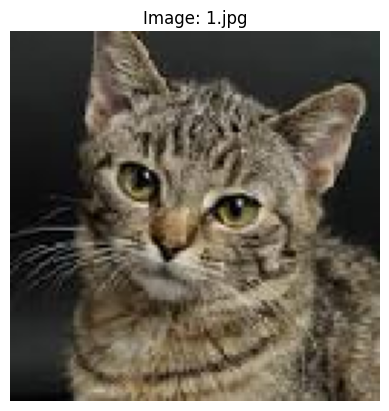

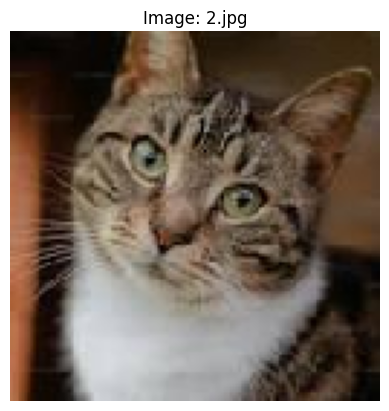

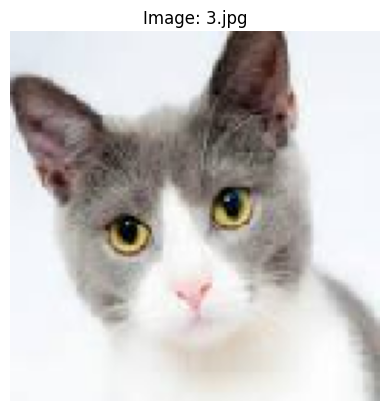

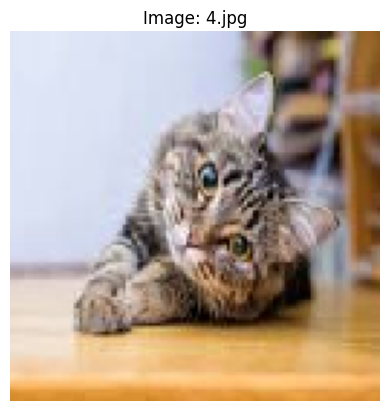

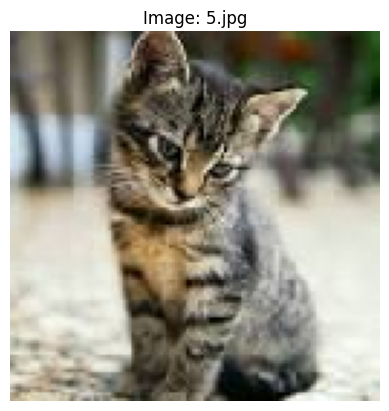

In [3]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Set your folder path
folder_path = '/content/drive/MyDrive/dataset/Train/cat'

# List image files (jpg/png)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Show first 5 images
for i in range(min(5, len(image_files))):
    img_path = os.path.join(folder_path, image_files[i])
    img = image.load_img(img_path, target_size=(128, 128))

    plt.imshow(img)
    plt.title(f"Image: {image_files[i]}")
    plt.axis('off')
    plt.show()

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten, RandomFlip
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [5]:
base_dir = '/content/drive/MyDrive/dataset'
train_dir = os.path.join(base_dir, 'Train')
test_dir = os.path.join(base_dir, 'Test')

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

img_size = (150, 150)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 92 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


In [7]:
# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Save the model
model.save("dog_cat_classifier.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 30s 24s/step - accuracy: 0.4674 - loss: 1.0930 - val_accuracy: 0.4688 - val_loss: 0.9751
Epoch 2/10
1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4375 - loss: 0.9962

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - accuracy: 0.4375 - loss: 0.9962 - val_accuracy: 0.5000 - val_loss: 0.7744
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 11s/step - accuracy: 0.4062 - loss: 0.7949 - val_accuracy: 0.5000 - val_loss: 0.6909
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5357 - loss: 0.6887 - val_accuracy: 0.5469 - val_loss: 0.6905
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5333 - loss: 0.6912 - val_accuracy: 0.5469 - val_loss: 0.6888
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 951ms/step - accuracy: 0.5625 - loss: 0.6874 - val_accuracy: 0.5469 - val_loss: 0.6867
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5646 - loss: 0.6839 - val_accuracy: 0.6250 - val_loss: 0.6665
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 951ms/step - accuracy: 0.5312 - loss: 0.6914 - val_accuracy: 0.4844 - val_loss: 0.6917
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.5521 - loss: 0.6912 - val_accuracy: 0.4688 - val_loss: 0.6889
Epoch 10/10
2/2 ━━

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.0 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model("dog_cat_classifier.h5")

# Ensure the model is compiled (to avoid warnings)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prediction function
def predict_pet(img):
    # Resize image to model's expected input size
    img = img.resize((150, 150))

    # Convert to array and normalize
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)[0][0]  # Binary classification output

    # Return the class based on threshold
    if prediction >= 0.5:
        return "Dog 🐶"
    else:
        return "Cat 🐱"

# Gradio interface setup
interface = gr.Interface(
    fn=predict_pet,
    inputs=gr.Image(type="pil", label="Upload an image"),
    outputs=gr.Text(label="Prediction"),
    title="Dog vs Cat Classifier",
    description="Upload an image to detect whether it's a Dog or a Cat.",
    theme="default"
)

# Launch the app
interface.launch()
